In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import math
import numpy as np

## Local Search

Unlike "Constructive Algorithms" (which build a solution from scratch, like solving a linear equation), Local Search starts with a complete (but likely bad) solution and tries to fix it iteratively.

The Three Pillars of Local Search:
- State ($S$): A candidate solution.
- Objective Function ($f(S)$): A way to score how "good" the state is.
- Neighbor ($N(S)$): A slightly modified version of the current state.

## Hill Climbing (The Greedy Approach)

Hill Climbing is the simplest form of local search. It is a loop that constantly moves in the direction of increasing value—it is "greedy."

### The Algorithm
- Start with a random solution (Current State).

- Look at all (or some) Neighbors.

- Evaluate the neighbors using the Objective Function.

- Compare:

    - If a neighbor is better than the Current State: Move there.

    - If no neighbor is better: Stop. You have reached a peak.


### Biggest Triangle.
Let us consider the problem of finding the triangle with maximum area from given 500 points.

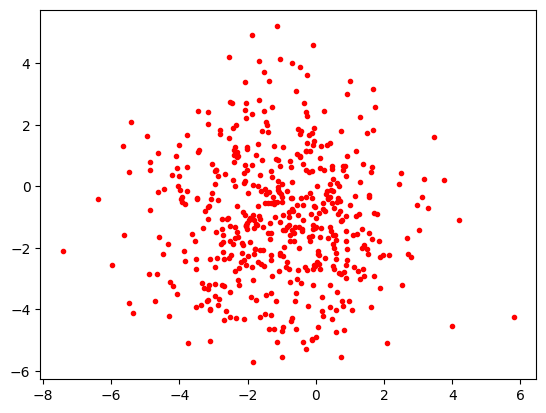

In [3]:
np.random.seed(13)
n = 500
x = np.random.randn(n)*2-1
y = np.random.randn(n)*2-1
plt.plot(x,y,'.r')

In [4]:
def triarea(x1,y1, x2,y2, x3,y3):
    #shoelace formula
    return 0.5*abs(x1*y2 + x2*y3 + x3*y1 - y1*x2 - y2*x3 - y3*x1)

def triarea2(r):
    x1,y1 = r[0]
    x2,y2 = r[1]
    x3,y3 = r[2]
    return triarea(x1,y1, x2,y2, x3,y3)

1) If there are $n$ points, what is the running time if you try brute force algorithm?

2) What is our state?

3. How to define 'Neighbors'?

Iter 1: Found better score 1.4993
Iter 2: Found better score 2.3652
Iter 4: Found better score 6.1975
Iter 22: Found better score 8.3249
Iter 32: Found better score 13.0375
Iter 42: Found better score 17.9492
Iter 61: Found better score 27.2890
Iter 91: Found better score 29.1985
Iter 107: Found better score 33.4618
Iter 245: Found better score 35.0316
Iter 529: Found better score 39.2257
Iter 776: Found better score 39.8193
Iter 1248: Found better score 44.1367
Iter 1476: Found better score 49.2963
Iter 1815: Found better score 55.0250
Best State: (205, 191, 376)
Best Area: 55.02495940056191


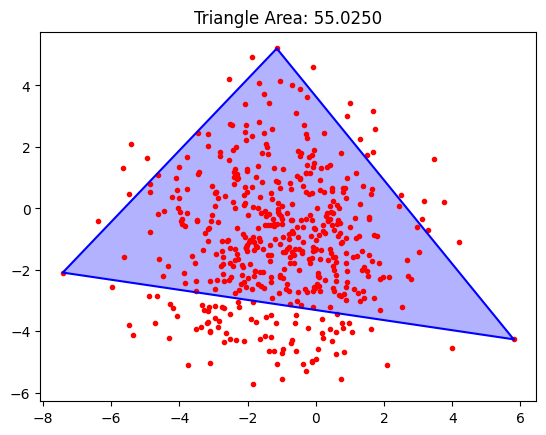

In [5]:
from typing import Tuple

# Type alias for readability
State = Tuple[int, int, int]

# Example initial state
initial_state = (3, 6, 5) 


# 1. Evaluate how good a state is (Objective Function)
def score(state: State) -> float:
    s1, s2, s3 = state
    return triarea(
        x[s1], y[s1],
        x[s2], y[s2],
        x[s3], y[s3]
    )

# 2. Perturb (Create a neighbor)
# This function creates a new state by slightly changing the current one.
def perturb(state: State) -> State:
    # Pick which index to change (0, 1, or 2)
    idx = np.random.randint(0, 3) 
    ret = [s for s in state]
    ret[idx] = np.random.randint(0, n)
    
    return tuple(ret)

# 3. Optimization Loop (Hill Climbing)
def optimize(initial_state, score_func, perturb_func, iterations=10000):
    current_state = initial_state
    current_score = score_func(current_state)
    
    for i in range(iterations):
        # Try a new state
        trying_state = perturb_func(current_state)
        trying_score = score_func(trying_state)
        
        # If it's better, keep it (Hill Climbing logic)
        if trying_score > current_score:
            current_state = trying_state
            current_score = trying_score
            
            # Optional: Print progress
            print(f"Iter {i}: Found better score {current_score:.4f}")
            
    return current_state, current_score

def visualize_triangle(state: State):
    s1, s2, s3 = state
    plt.plot(x, y, '.r')
    triangle_x = [x[s1], x[s2], x[s3], x[s1]]
    triangle_y = [y[s1], y[s2], y[s3], y[s1]]
    plt.plot(triangle_x, triangle_y, '-b')
    plt.fill(triangle_x, triangle_y, 'b', alpha=0.3)
    plt.title(f'Triangle Area: {score(state):.4f}')
    plt.show()

# --- Usage ---

best_state, best_score = optimize(initial_state, score, perturb, iterations=100000)
print(f"Best State: {best_state}")
print(f"Best Area: {best_score}")
#visualize_triangle((3,6,5))
visualize_triangle(best_state)

2) How do we **move** from existing state to the next?

3) How do we decide whether to keep it or not?

4) Now find those three points.

### Scheduling Exam

Give classes and the intersection of students. Find a decent scheduling under 15 slot for 70 classes. Number of student taking both class `i` and class `j` can be found using `student[i][j]`.

[[ 0 43  0 ... 35 68 69]
 [43  0  0 ...  0 22 36]
 [ 0  0  0 ... 28  0 35]
 ...
 [35  0 28 ...  0 28  0]
 [68 22  0 ... 28  0  5]
 [69 36 35 ...  0  5  0]]


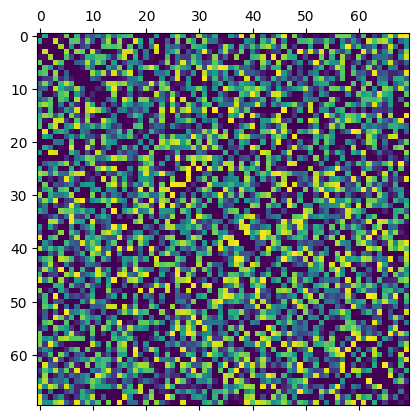

In [6]:
nclass = 70
student = np.random.randint(0,100,(nclass, nclass))

np.random.seed(222)
for i in range(nclass-1):
    for j in range(i+1,nclass):
        student[i,j] = student[j,i]

for i in range(nclass):
    student[i,i] = 0 
    
student[student>70] = 0
    
print(student)

plt.matshow(student)

1) If there are $n$ classes and $k$ time slots, what is the running time if you brute force?

33

2) What is our cost function

In [15]:
# 70 class
# 15 timeslot
initial_state = [1] * 70
n_time_slot = 15
n_class = 70

def perturb(state):  # return another state (make a copy)
    ret = state.copy()
    # pick the class
    idx = np.random.randint(n_class)
    # pick the new time slot
    ts = np.random.randint(n_time_slot)
    ret[idx] = ts
    return ret

def score(state):  # return float
    complaints = 0
    for (i_class, timeslot) in enumerate(state):
        for j_class in range(i_class + 1, n_class):
            if state[j_class] == state[i_class]:  # share the timeslot
                complaints += student[i_class, j_class]
    return complaints
def optimize(initial_state, score, perturb, n=50000):
    # don't modify the argument
    current_state = initial_state
    current_score = score(current_state)

    for i in range(n):
        trying_state = perturb(current_state)
        trying_score = score(trying_state)

        if i % 1000 == 0:
            print(current_score)

        if trying_score < current_score:
            current_state = trying_state
            current_score = trying_score

    return current_state, current_score

print(optimize(initial_state, score, perturb))


61476
940
583
478
468
468
465
457
457
437
437
437
437
437
437
437
437
437
437
437
437
437
437
437
437
437
437
437
437
437
437
437
437
437
437
437
437
437
437
437
437
437
437
437
437
437
437
437
437
437
([4, 2, 5, 14, 4, 8, 4, 12, 6, 14, 9, 5, 6, 11, 11, 6, 0, 1, 12, 11, 12, 8, 11, 5, 0, 3, 9, 2, 10, 6, 0, 10, 14, 3, 13, 8, 1, 1, 7, 0, 12, 7, 3, 6, 3, 2, 14, 2, 1, 3, 11, 4, 4, 12, 4, 5, 12, 13, 8, 13, 9, 10, 9, 7, 13, 13, 10, 7, 5, 9], 437)


### Limitations of Hill Climbing
Hill Climbing is fast and simple, but it has a fatal flaw: it gets stuck easily.

- Local Optima: A small hill. You are at the top of this hill, so going any direction goes down. However, there is a taller mountain nearby that you cannot see because you refuse to go down to cross the valley.

- Plateaus: A flat area where all neighbors have the same score. The algorithm doesn't know which way to go and may wander aimlessly.

One easy way to fix these issues is to run Hill Climbing 100 times with different random starting states. Keep the best result. (still not guarantee to reach the global optima)

## Other Techniques

1. Simulated Annealing:

- Concept: 
    - Sometimes, you have to go downhill to cross a valley and find a higher mountain.

- Method:
    - Early in the process (High Temperature), accept worse moves freely. (Explore the map).
    - Later in the process (Low Temperature), only accept better moves. (Refine the solution).

2. Tabu Search 

- Concept: 
    - Don't walk in circles.

- Method: 
    - Keep a "Tabu List" (Forbidden List) of the last $N$ moves you made. You are not allowed to reverse a move or go back to a state you just visited recently.

3. Genetic Algorithms

- Concept: 
    - Evolution. Survival of the fittest.

- Method:

    - Don't start with 1 solution; start with a Population (e.g., 50 solutions).

    - Selection: Pick the best ones.

    - Crossover: Combine parts of Parent A and Parent B to make a Child.

    - Mutation: Randomly tweak the Child.


See https://www.youtube.com/watch?v=rYjxtmt8g9A for a nice animation on TSP problem (i.e. visit all vertices while minimizing the total distance)

### Example of Simulated Annealing on the Scheduling Exam Problem (not in final exam)

In [14]:
import numpy as np
import matplotlib.pyplot as plt

n_time_slot = 15
n_class = 70

# initial_state: any valid schedule, e.g. all in slot 1
initial_state = [1] * n_class 

def perturb(state):
    """Return a new state by changing one class to a random time slot."""
    ret = state.copy()
    idx = np.random.randint(n_class)        # pick class index to change
    ts = np.random.randint(n_time_slot)     # pick new time slot
    ret[idx] = ts
    return ret

def score(state):
    """Compute number of complaints for a given state (lower is better)."""
    complaints = 0
    for i_class, timeslot in enumerate(state):
        for j_class in range(i_class + 1, n_class):
            if state[j_class] == state[i_class]:  # share timeslot
                complaints += student[i_class, j_class]
    return complaints
def simulated_annealing(initial_state,
                        score_fn,
                        perturb_fn,
                        n_iterations=100000,
                        T_start=10.0,
                        T_end=0.01):
    """
    Simulated annealing:
    - initial_state: starting schedule
    - score_fn: function(state) -> float (lower is better)
    - perturb_fn: function(state) -> new_state
    """
    current_state = initial_state.copy()
    current_score = score_fn(current_state)

    best_state = current_state.copy()
    best_score = current_score

    # Storage for plotting
    current_scores = []
    best_scores = []

    # Precompute cooling factor for exponential schedule
    # T_k = T_start * (alpha^k), want T_end approx at last iteration
    alpha = (T_end / T_start) ** (1.0 / max(1, n_iterations - 1))

    T = T_start

    for i in range(n_iterations):
        # Propose a move
        candidate_state = perturb_fn(current_state)
        candidate_score = score_fn(candidate_state)
        delta = candidate_score - current_score  # >0 means worse

        # Accept if better, or with probability exp(-delta/T) if worse
        if delta <= 0:
            accept = True
        else:
            prob = np.exp(-delta / T)
            accept = (np.random.rand() < prob)

        if accept:
            current_state = candidate_state
            current_score = candidate_score

        # Track best seen
        if current_score < best_score:
            best_state = current_state.copy()
            best_score = current_score

        # Save for plotting
        current_scores.append(current_score)
        best_scores.append(best_score)

        # Cool down
        T *= alpha

        # Optional debug print
        if i % 1000 == 0:
            print(f"iter={i}, T={T:.4f}, current={current_score}, best={best_score}")

    return best_state, best_score, current_scores, best_scores
best_state, best_score, current_scores, best_scores = simulated_annealing(
    initial_state,
    score_fn=score,
    perturb_fn=perturb,
    n_iterations=50000,     # you can tune this
    T_start=50.0,           # higher T_start = more exploration early
    T_end=0.01
)
print(best_state)
print("Best score found:", best_score)


iter=0, T=49.9915, current=59787, best=59787
iter=1000, T=42.1614, current=2105, best=1798
iter=2000, T=35.5577, current=2127, best=1760
iter=3000, T=29.9884, current=1644, best=1383
iter=4000, T=25.2914, current=1454, best=1383
iter=5000, T=21.3300, current=1212, best=1127
iter=6000, T=17.9892, current=1058, best=1021
iter=7000, T=15.1715, current=599, best=593
iter=8000, T=12.7953, current=483, best=461
iter=9000, T=10.7912, current=453, best=436
iter=10000, T=9.1010, current=446, best=418
iter=11000, T=7.6755, current=380, best=380
iter=12000, T=6.4733, current=362, best=362
iter=13000, T=5.4594, current=330, best=324
iter=14000, T=4.6043, current=262, best=248
iter=15000, T=3.8831, current=248, best=248
iter=16000, T=3.2749, current=250, best=245
iter=17000, T=2.7620, current=251, best=245
iter=18000, T=2.3294, current=244, best=244
iter=19000, T=1.9645, current=244, best=244
iter=20000, T=1.6568, current=244, best=244
iter=21000, T=1.3973, current=244, best=244
iter=22000, T=1.178